<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/FourierActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp

Let's build the Fourier Series for the Half-Wave Rectivied Sinusoid from the text.

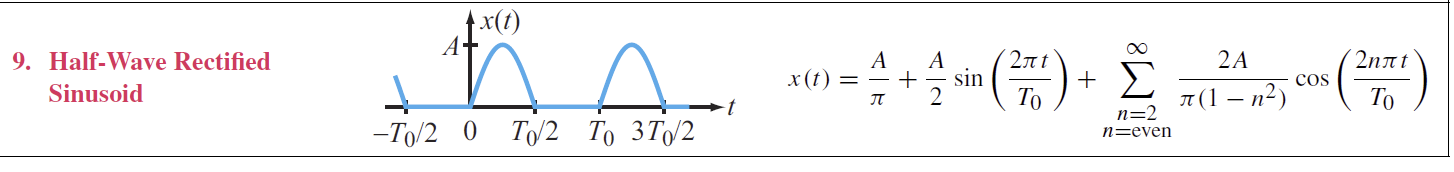

Note the textbook series has $(1-n^2)$ in the denominator. This will be a *negative* number for all $n$ values in the series.

In [ ]:
t,T0,A = sp.symbols('t,T0,A', real=True, positive=True)
N = 10

In [ ]:
omega0 = 2*sp.pi/T0
omega0

In [ ]:
# this is a more general way to define a piecewise function
# it says "f(t) is A*sp.sin(omega0*t) when t<T0/2, and 0 otherwise"

f = sp.Piecewise((A*sp.sin(omega0*t), t < T0/2), (0, True))

In [ ]:
c0 = 1/sp.sqrt(T0)*sp.integrate(f,(t,0,T0)) # this is the ket |c0>
c0

In [ ]:
c1 = sp.sqrt(2/T0)*sp.integrate(sp.cos(omega0*t)*f,(t,0,T0)) # this is the ket |c1>
c1

In [ ]:
s1 = sp.sqrt(2/T0)*sp.integrate(sp.sin(omega0*t)*f,(t,0,T0)) # this is the ket |s1>
s1 = sp.simplify(s1)
s1

In [ ]:
basisFunctions = {} # let's create a collection of kets with labels
for i in range(N):
  if i == 0:
    basisFunctions[f'c{i}'] = sp.sqrt(1/T0)
  else:
    basisFunctions[f'c{i}'] = sp.sqrt(2/T0)*sp.cos(i*omega0*t)
    basisFunctions[f's{i}'] = sp.sqrt(2/T0)*sp.sin(i*omega0*t)

In [ ]:
coefs = {} # now compute the series coefficients
for k in basisFunctions:
  coefs[k] = sp.integrate(basisFunctions[k]*f,(t,0,T0))

In [ ]:
f_series = basisFunctions['c0']*coefs['c0'] # Now, let's build the series.
for k in basisFunctions:
  if k != 'c0':
    f_series += basisFunctions[k]*coefs[k]

In [ ]:
subsVals = {A:1, T0:1} # evaluate with A=1, and T0=1
f_series.subs(subsVals)

In [ ]:
sp.plot(f_series.subs(subsVals),f.subs(subsVals), (t,0,1)) # let's plot it, good!

In [ ]:
RC = .01 # time constant
N = 10

def Hmag(omega):
  return omega*RC/(sp.sqrt((omega*RC)**2+1))

def Hphase(omega):
  return sp.pi/2 - sp.atan(omega*RC)



In [ ]:
hmags = {}
hphases = {}
for i in range(N):
  hmags[f'c{i}'] = Hmag(i*omega0)
  hphases[f'c{i}'] = Hphase(i*omega0)
  hmags[f's{i}'] = Hmag(i*omega0)
  hphases[f's{i}'] = Hphase(i*omega0)



In [ ]:
f_output = coefs['c0']*1/sp.sqrt(T0)*hmags['c0'] # Now, let's build the series.
for k in coefs:
  if k != 'c0':
    i = int(k[1:])
    if k[0] == 's':
        f_output += coefs[k]*sp.sqrt(2/T0)*sp.sin(i*omega0*t + hphases[k])
    else:
        f_output += coefs[k]*sp.sqrt(2/T0)*sp.cos(i*omega0*t + hphases[k])

f_output

In [ ]:
f_output.subs(subsVals)

In [ ]:
sp.plot(f_output.subs(subsVals),f.subs(subsVals), (t,0,1)) # let's plot it, good!